# **LSTM 활용한 주가 예측**

---



---

## **시계열 데이터 분석 및 LSTM 활용한 Apple 주가 예측**

- 주가 데이터는 시간 순서에 따라 나열된 시계열 데이터의 일종으로 과거 데이터가 현재 가격에 영향을 미칠 수 있다는 아이디어에 기반하여 LSTM 모델을 사용하여 주가 예측
- 데이터: yfinance 라이브러리


**LSTM(Long Short-Term Memory)**

> LSTM은 전통적인 순환 신경망(RNN)의 소실 기울기(vanishing gradient) 문제를 해결하기 위해 개발된 기술이다. RNN은 장기 의존성 문제로 인해 먼 과거의 시계열 데이터 정보를 결과에 반영하기 어려운 단점 존재하기 때문에 LSTM은 셀 상태에 정보를 장기간 유지함으로써 이를 해결한다. 셀 상태는 지속적으로 업데이트되며, 축적된 정보를 반영하여 최종 출력값에 영향을 준다.

\
**목적**
- 시계열 데이터 시각화 및 분석
- 시계열 데이터의 트렌드, 계절성, 잔차 분석
- 시계열 예측을 위한 LSTM 적용

\
**목차**
1. Set up & Import Data
2. Visualization
3. Modeling - LSTM
4. Prediction
5. Result

<details>
  <summary>Click for English version</summary>

# **STOCK PRICE PREDICTION with LSTM**

---



---
## **Apple Stock Price Prediction with LSTM model**

- Stock price data is kind of Times Series data, which is a series of data points indexed (or listed or graphed) in time order. With a thought that the price could be affected by previous data, a prediction of this project is forecasted by LSTM model.
- Data source is from yfinance library.

**LSTM(Long Short-Term Memory)**

> LSTM is a technique developed to prevent the vanishing gradient problem of traditional Recurrent Neural Networks (RNNs). RNNs have a long-term dependency issue, making it difficult to reflect information from far past temporal data in the results. LSTM addresses this by retaining information in a cell state over a long period. The cell state is continuously updated, allowing it to influence the final output by reflecting the accumulated information.

**OBJECTIVE**
- Visualize and analyze time series data
- Analyze trends, seasonality, and residuals in time series data
- Apply LSTM for time series forecasting

**TABLE OF CONTENTS**
1. Set up & Import Data
2. Visualization
3. Modeling - LSTM
4. Prediction
5. Result

# 1. Set up & Import Data

In [ ]:
#Set up
import yfinance as yf
import pandas as pd
import numpy as np

#Visualization
from matplotlib import pyplot as plt
import plotly.graph_objects as go

#Tren, Seasoanlity
import statsmodels.api as sm

#Preprocessing
from sklearn.preprocessing import MinMaxScaler
import math

#LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping

In [ ]:
#APPLE Stock Price
ticker = 'AAPL'

#Period
start_date = '2000-01-01'
end_date = '2024-08-05'

In [ ]:
df = yf.download(ticker, start = start_date, end = end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400
...,...,...,...,...,...,...
2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800
2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300


In [ ]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-22,227.009995,227.779999,223.089996,223.960007,223.960007,48201800
2024-07-23,224.369995,226.940002,222.679993,225.009995,225.009995,39960300
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.960007,41601300
2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800
2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300
2024-08-01,224.369995,224.479996,217.020004,218.360001,218.360001,62501000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6185 entries, 2000-01-03 to 2024-08-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6185 non-null   float64
 1   High       6185 non-null   float64
 2   Low        6185 non-null   float64
 3   Close      6185 non-null   float64
 4   Adj Close  6185 non-null   float64
 5   Volume     6185 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 338.2 KB


- Index: Datetime
- Open: 시가
- High: 고가
- Low: 저가
- Close: 종가
- Adj Close: 조정된 종가
- Volume: 거래량

*조정된 종가를 예측하기 위한 모델을 설계할 예정으로 종가(Close)를 삭제하기로 한다.*

<details>
  <summary>Click for English version</summary>

**Information of columns in dataset**
- Index: Datetime
- Open: Opening Price
- High: Highest Price
- Low: Lowest Price
- Close: Close Price
- Adj Close: Adjusted Close Price
- Volume: Trading Volume

*To design a model for predicting the adjusted closing price, we will remove the closing price (Close) from the dataset*

In [ ]:
#check null
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


- No Missing Values

In [ ]:
#Remove Close and change col name of Adj Close
df['Adj_Close'] = df['Adj Close']
df.drop(columns=['Adj Close', 'Close'], inplace=True)
df

,Open,High,Low,Volume,Adj_Close
Date,,,,,
2000-01-03,0.936384,1.004464,0.907924,535796800,0.844981
2000-01-04,0.966518,0.987723,0.903460,512377600,0.773741
2000-01-05,0.926339,0.987165,0.919643,778321600,0.785063
2000-01-06,0.947545,0.955357,0.848214,767972800,0.717125
2000-01-07,0.861607,0.901786,0.852679,460734400,0.751094
...,...,...,...,...,...
2024-07-29,216.960007,219.300003,215.750000,36311800,218.240005
2024-07-30,219.190002,220.330002,216.119995,41643800,218.800003
2024-07-31,221.440002,223.820007,220.630005,50036300,222.080002


# 2. Visualization

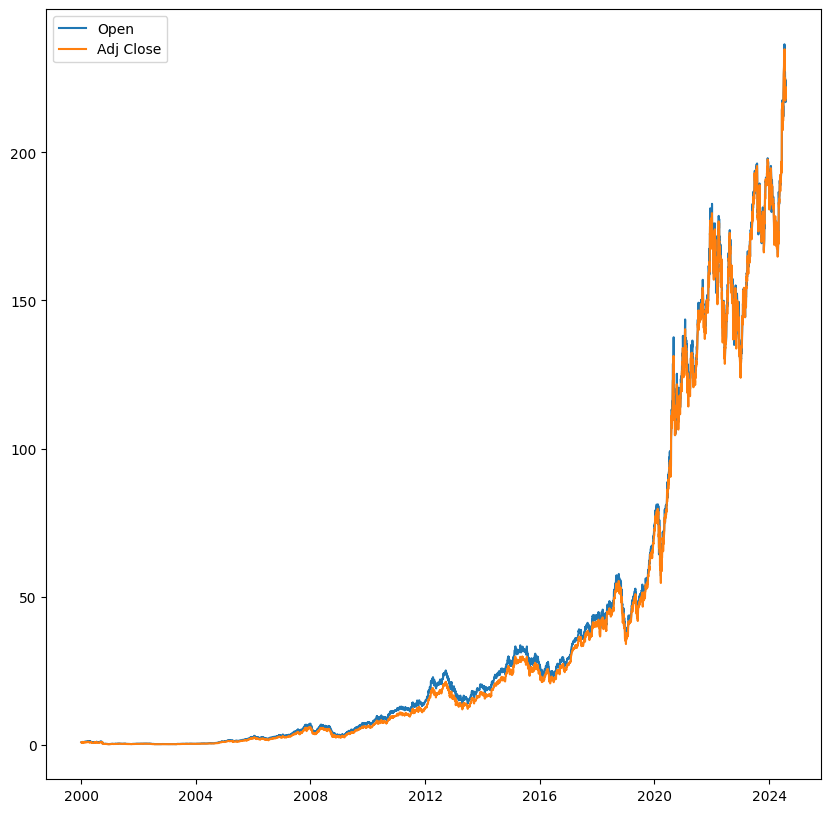

In [ ]:
#Open and Close Price
plt.figure(figsize=(10,10))
plt.plot(df['Open'])
plt.plot(df['Adj_Close'])
plt.legend(['Open', 'Adj Close'])
plt.show()

- 전반적으로 큰 차이가 나진 않으나 2008년~2022년의 경우 시가보다 종가가 낮은 경향을 띠는 것을 알 수 있다.

<details>
  <summary>Click for English version</summary>

- Overall, there is not a significant difference, but from 2008 to 2022, it can be observed that the closing price tends to be lower than the opening price.

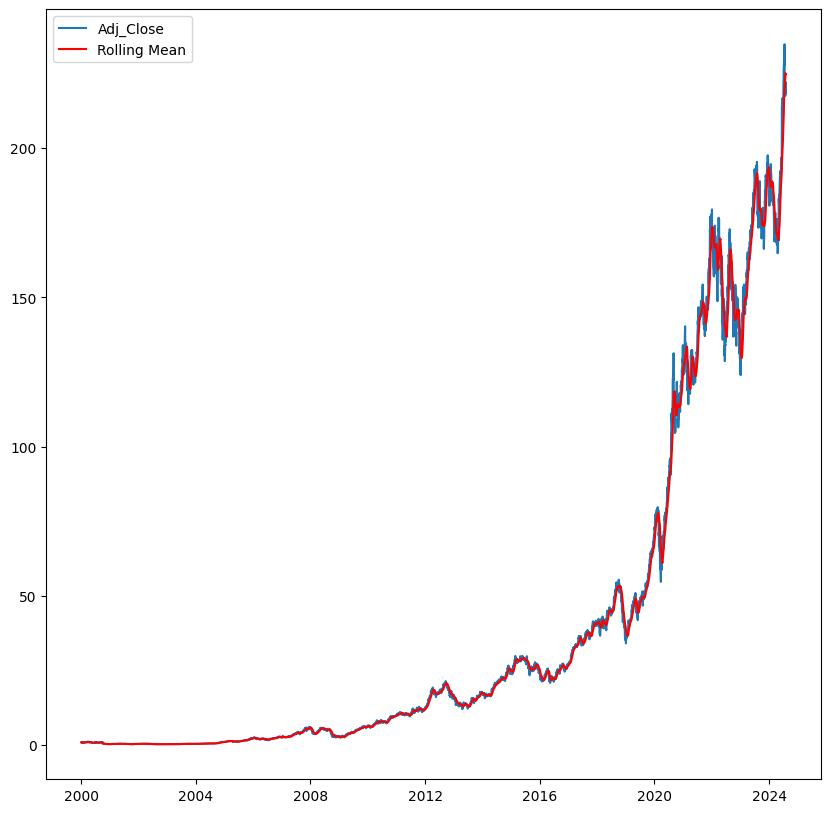

In [ ]:
#Average Price in a month
rolling_close = df['Adj_Close'].rolling('30D').mean()

plt.figure(figsize=(10, 10))
plt.plot(df['Adj_Close'])
plt.plot(rolling_close, color='red')
plt.legend(['Adj_Close', 'Rolling Mean'])
plt.show()

- 2024년 최근의 데이터를 보았을 때, 30일 기준으로 주가가 이동 평균선 위에 위치하고 있는 것으로 상승 추세였던 것을 알 수 있다.

<details>
  <summary>Click for English version</summary>

- Based on recent data from 2024, it can be observed that the stock price has been above the 30-day moving average, indicating an uptrend

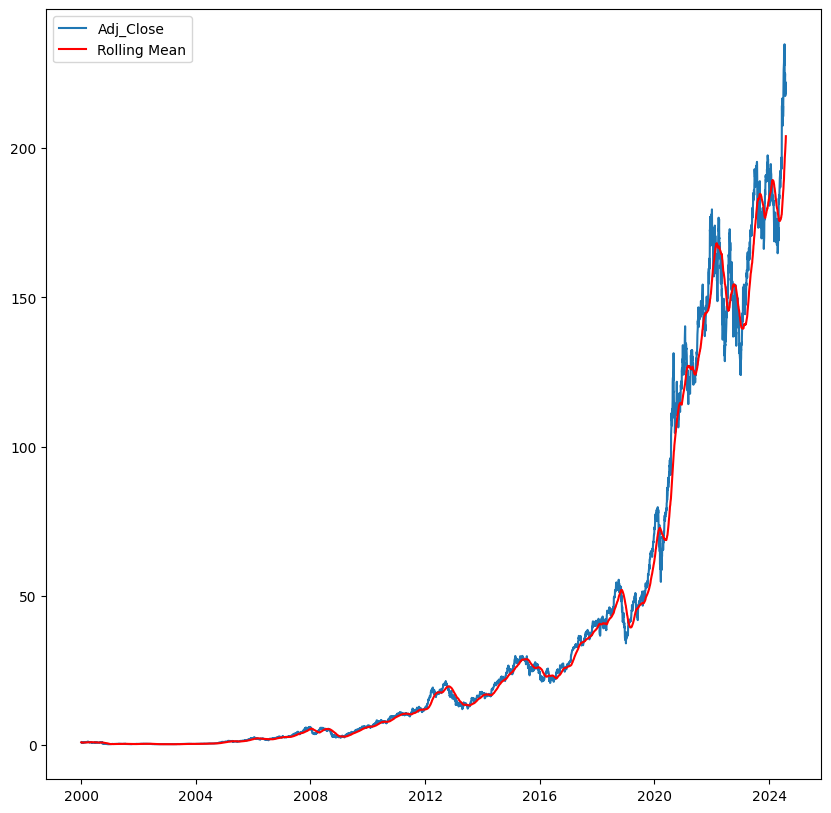

In [ ]:
#Average price in 100 days
rolling_close = df['Adj_Close'].rolling('100D').mean()

plt.figure(figsize=(10, 10))
plt.plot(df['Adj_Close'])
plt.plot(rolling_close, color='red')
plt.legend(['Adj_Close', 'Rolling Mean'])
plt.show()

- 장기적(100일)인 평균으로 보았을 때에도, 2024년 주가는 상승추세인 것을 알 수 있다.

<details>
  <summary>Click for English version</summary>

- Even when looking at the long-term (100-day) average, it is evident that the stock price has been on an upward trend in 2024.

## 2.1 OHLC Chart

In [ ]:
#OHLC for all datetime
trace = go.Ohlc(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Adj_Close']
                )

data = [trace]
layout = go.Layout()

fig = go.Figure(data=data, layout=layout)
fig.show()

OHLC Chart Image
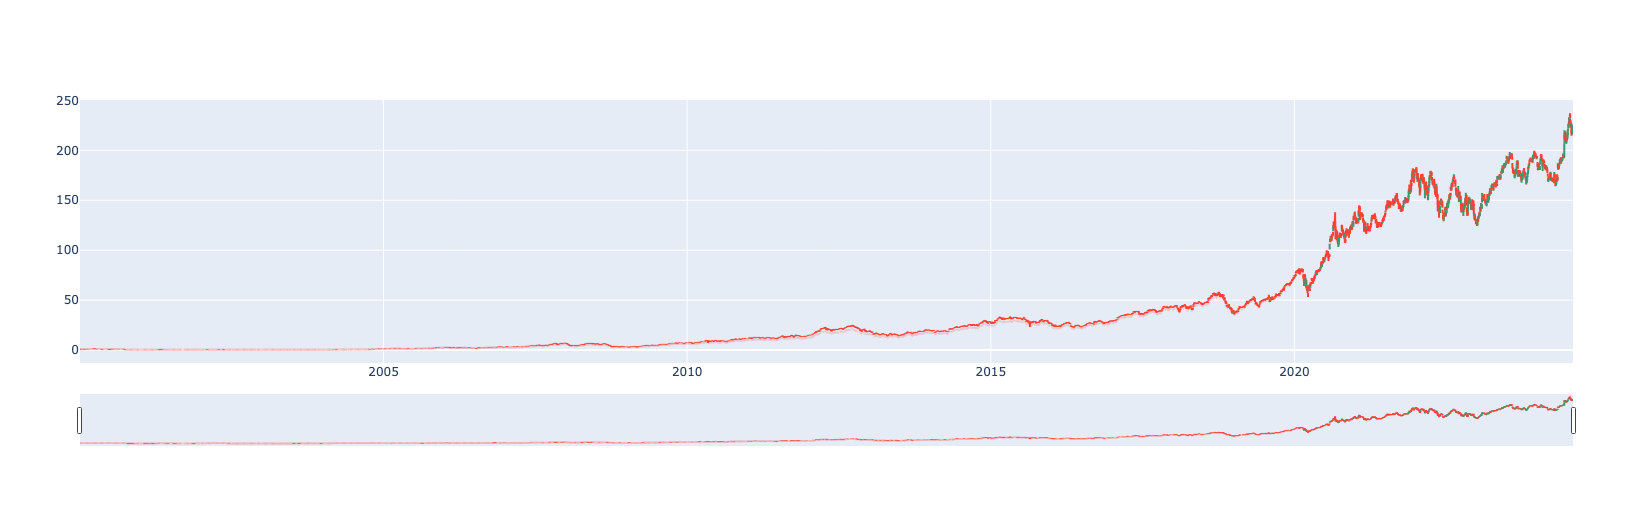

- 대략 2022년 이전에는 하락추세였던 것을 알 수 있다.
- 이후 상승 추세가 조금씩 눈에 띄며 2024년 상반기는 확연히 상승추세인 것을 확인할 수 있다.

<details>
  <summary>Click for English version</summary>

- Prior to approximately 2022, it can be seen that there was a downward trend.
- Following that, a gradual upward trend became noticeable, with a clear upward trend evident in the begining of 2024.

In [ ]:
#OHLC for 2024
df_2024 = df[df.index >= '2024-01-01']

trace_24 = go.Ohlc(x=df_2024.index,
                   open=df_2024['Open'],
                   high=df_2024['High'],
                   low=df_2024['Low'],
                   close=df_2024['Adj_Close'])

data = [trace_24]

fig = go.Figure(data=data, layout=layout)
fig.show()

2024 OHLC Chart Image

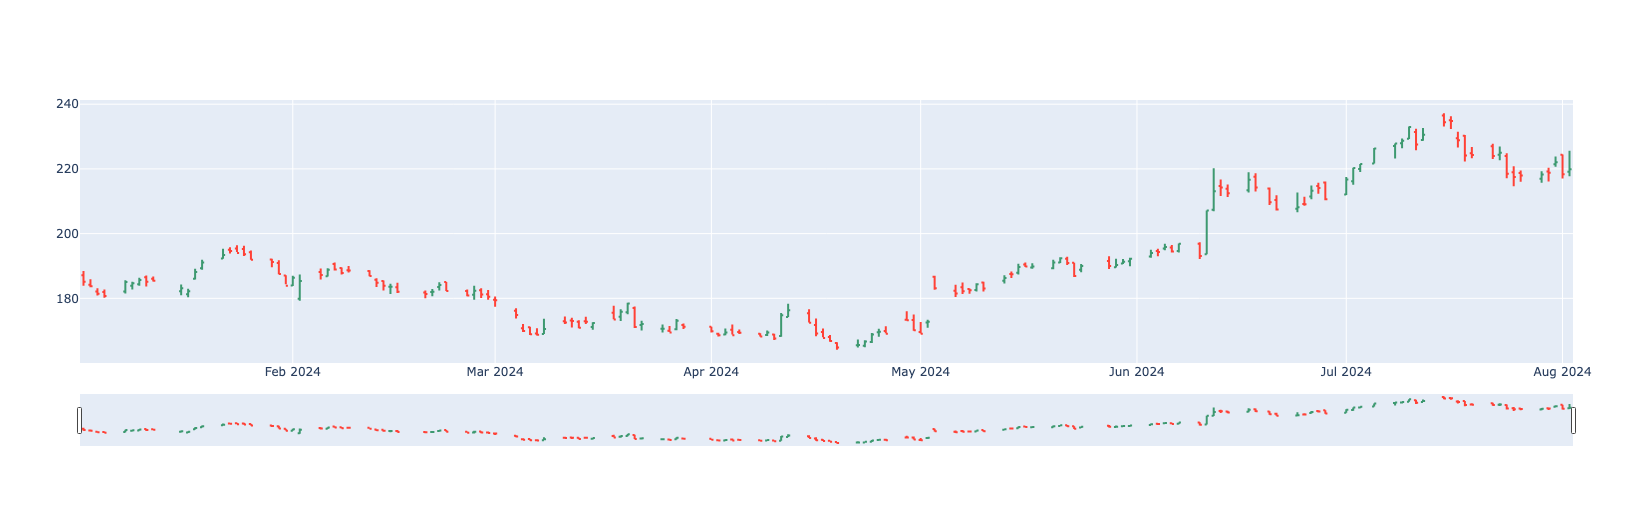

- 2024년 상반기는 매달 상승과 하락추세가 비슷한 비율을 보여주고 있는 것으로 해석된다.
- 그 중 1월, 6월, 7월은 상승추세가 하락추세보다 많은 비중을 차지하고 있는 것으로 보인다.

<details>
  <summary>Click for English version</summary>

- The data of 2024 shows a similar ratio of upward and downward trends each month.
- Among these, January, June, and July appear to have a higher proportion of upward trends compared to downward trends.

## 2.2 Candlestick Chart

In [ ]:
#Candlestick for all datetime
trace = go.Candlestick(
                x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Adj_Close']
                )

data = [trace]

fig = go.Figure(data=data, layout=layout)
fig.show()

Candle Stick Chart Image

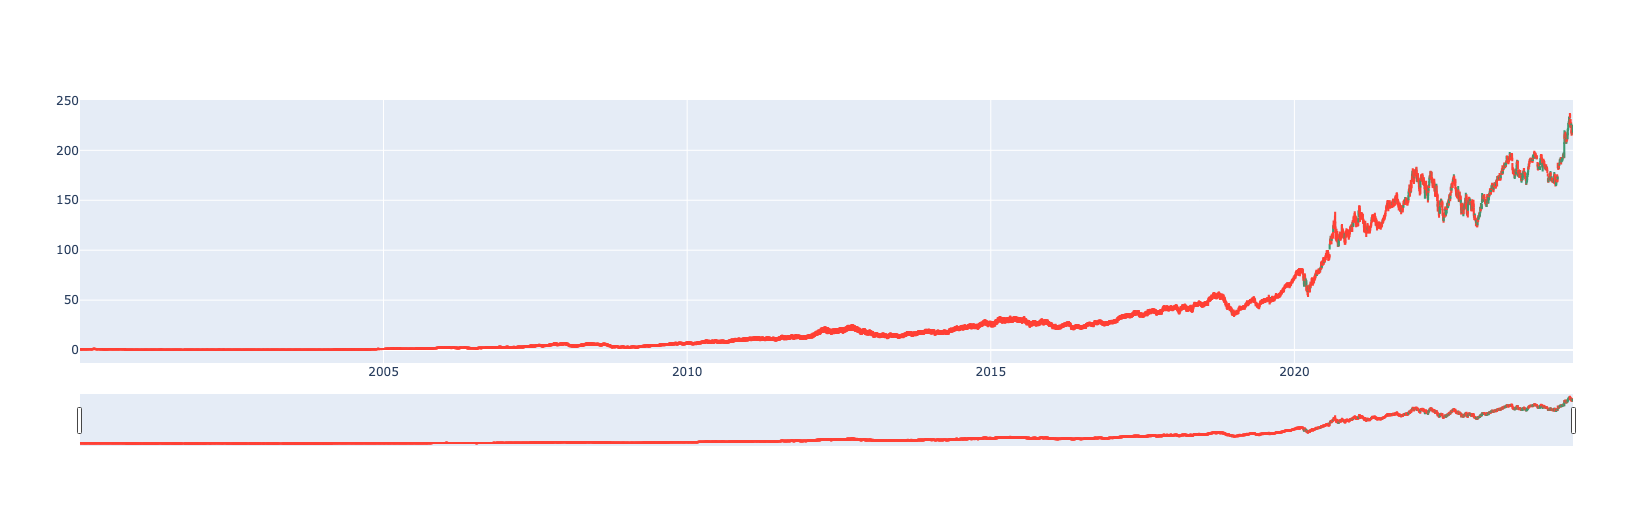

- CandleStick 차트를 통해서도 OHLC 와 같은 해석을 할 수 있다.
  - 대략 2022년 이전에는 하락추세였던 것을 알 수 있다.
  - 이후 상승 추세가 조금씩 눈에 띄며 2024년 상반기는 확연히 상승추세인 것을 확인할 수 있다.

<details>
  <summary>Click for English version</summary>

- The same interpretations can be made through a candlestick chart as with OHLC data.

  - Prior to approximately 2022, a downward trend is evident.
  - Following that, a gradual upward trend becomes noticeable, with a clear upward trend observable in the first half of 2024.

In [ ]:
#Candlestick for 2024
trace_24 = go.Candlestick(
                    x=df_2024.index,
                   open=df_2024['Open'],
                   high=df_2024['High'],
                   low=df_2024['Low'],
                   close=df_2024['Adj_Close'])

data = [trace_24]

fig = go.Figure(data=data, layout=layout)
fig.show()

2024 Candle Stick Chart Image

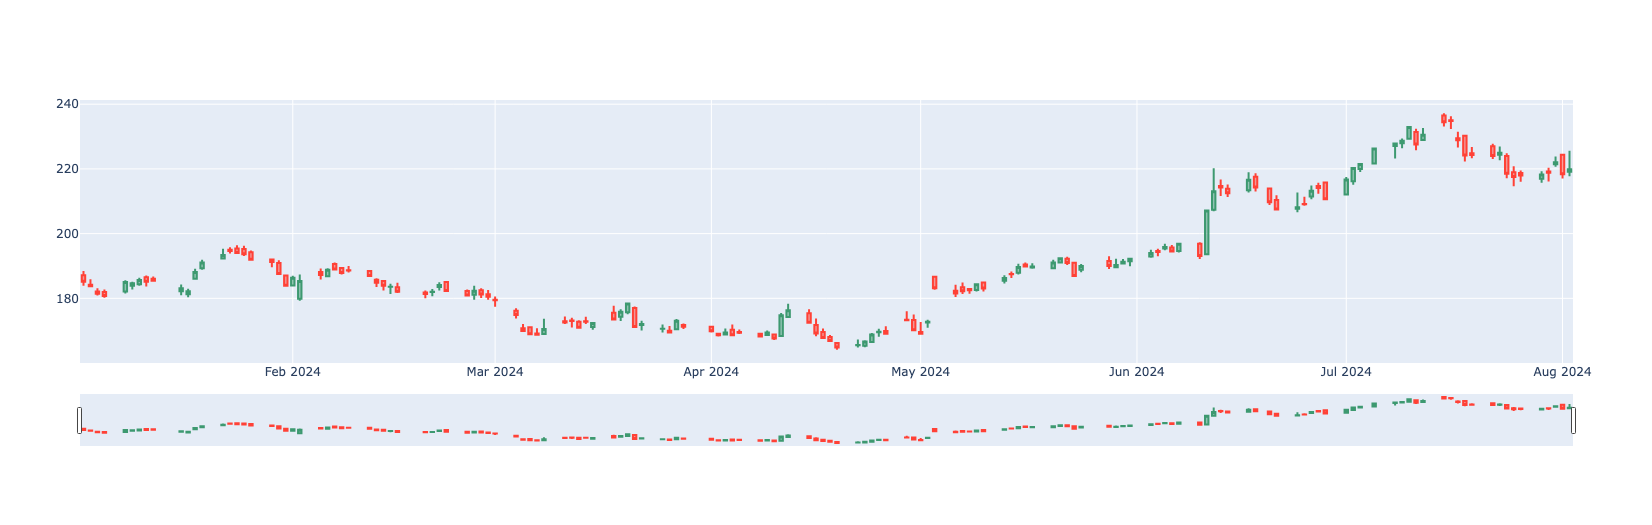

**2024년의 주가를 Candle Stick으로 살펴보았을 때, 아래와 같은 해석을 할 수 있다.**
- 바디가 긴 초록 그래프: 특히 6, 7월
  - 강한 매수세
  - 상승 추세
  - 투자자들의 긍정적 시장 평가
- 7월 중순
  - 강한 매도세
  - 하락 추세
  - 외부 요인으로 인해 시장의 불확실성 증가

<details>
  <summary>Click for English version</summary>

**With 2024 stock price using candlestick charts, the following interpretations can be made:**
- Long green bodies, particularly in June and July:
  - Strong buying pressure
  - Upward trend
  - Positive market sentiment from investors
- Mid-July:
  - Strong selling pressure
  - Downward trend
  - Increased market uncertainty due to external factors

## 2.3 Trend, Seasonality, Noise

<Figure size 1100x900 with 0 Axes>

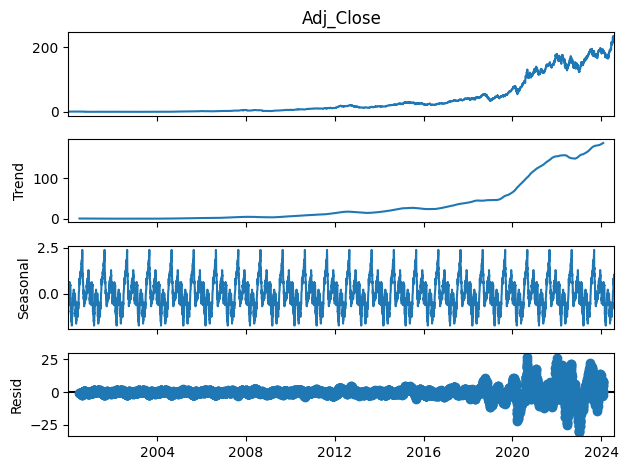

In [ ]:
decomposed_df = sm.tsa.seasonal_decompose(df['Adj_Close'], period=252)

plt.figure(figsize=(11,9))
decomposed_df.plot()
plt.show()

**Trend**
- 장기적인 증가 추세
- 2010년 이후 급격한 상승 추세

**Seasonal**
- 매년 일정한 패턴

**Resid**
- 대략 2018년까지는 잔차가 일정하게 분포
- 이후 변동폭이 커지고 있는 것으로 보아 주가의 변동성이 커지고 있으므로 투자 리스크 관리의 중요성이 커짐

<details>
  <summary>Click for English version</summary>

**Trend**
- Long-term upward trend
- Sharp increase since 2010

**Seasonal**
- Consistent annual patterns

**Resid**
- Residuals were relatively stable until around 2018
- Since then, the range of residuals has increased, indicating greater volatility in the stock price and highlighting the growing importance of managing investment risk

# 3. Modeling - LSTM

## 3.1 Preprocessing

In [ ]:
#Previous 2024 for train, 2024 for test
train_df = df[:'2023-12-31']
test_df = df['2024-01-01':]

2024년 이전의 데이터를 train으로 사용하고 이후의 데이터를 test로 사용하기로 한다.

<details>
  <summary>Click for English version</summary>

We will use data prior to 2024 for training and data from 2024 onwards for testing.

In [ ]:
train_data_len = len(train_df)
train_data_len

6037

In [ ]:
#Target "Adj_Close"
data_close = df.filter(['Adj_Close'])
#df to numpy array
dataset = data_close.values

In [ ]:
#MinMaxScaler for training Model
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:train_data_len, :]

#Prediction with previouse 60 days data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00275722, 0.00245358, 0.00250183, 0.00221227, 0.00235705,
       0.00230075, 0.00213988, 0.00196091, 0.00226857, 0.00238721,
       0.00249982, 0.00258428, 0.00280749, 0.00273711, 0.00257423,
       0.00276727, 0.00270091, 0.00269488, 0.00242542, 0.00249379,
       0.00238118, 0.00233493, 0.00247972, 0.00263053, 0.00282558,
       0.00285173, 0.00277933, 0.00280749, 0.00265466, 0.00288189,
       0.00298444, 0.00282759, 0.00285173, 0.0027351 , 0.00281754,
       0.00289596, 0.00286228, 0.00270694, 0.00279944, 0.00284368,
       0.00334841, 0.00308097, 0.00327401, 0.00319961, 0.00310911,
       0.00308097, 0.00308901, 0.00320162, 0.00305884, 0.00283162,
       0.00289596, 0.00306689, 0.00317749, 0.00311314, 0.00349721,
       0.00379482, 0.00370232, 0.00361787, 0.00364602, 0.00363194])]
[0.003529388804073838]



이전 60일 주가 데이터를 기준으로 모델 예측을 진행한다.

<details>
  <summary>Click for English version</summary>

The model prediction will be based on the previous 60 days of stock price data.

In [ ]:
#list to numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshape to (number of sample, length of Sequence=60, number of feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5977, 60, 1)

- 5977개의 주가 데이터는 이전 60일간의 데이터를 포함한다.

<details>
  <summary>Click for English version</summary>

- The 5,977 stock price data points include data from the previous 60 days.

## 3.2 Modeling

In [ ]:
#Build model
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

#Early stopping if there's no significant reduction in error for 10 consecutive epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
#train model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Epoch 1/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 5.8288e-05 - val_loss: 5.9712e-04
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 4.3695e-05 - val_loss: 6.3618e-04
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 4.9697e-05 - val_loss: 7.6114e-04
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - loss: 5.9408e-05 - val_loss: 0.0015
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 4.6128e-05 - val_loss: 4.4617e-04
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - loss: 4.1170e-05 - val_loss: 4.1764e-04
Epoch 8/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - loss: 3.7633e-05 - val_loss: 0.0020
Epoch 9/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - loss: 4.3034e-05 - val_loss: 4.1293e-04
Epoch 10/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - loss: 3.4557e-05 - val_loss: 5.1190e-04
Epoch 11/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s

In [ ]:
#test data
test_data = scaled_data[train_data_len - 60: , :]

x_test = []
y_test = dataset[train_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#list to numpy
x_test = np.array(x_test)

In [ ]:
#reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(148, 60, 1)

In [ ]:
#prediction with model
predictions = model.predict(x_test)

#inverse MinMaxScaler
predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


## 3.3 Evaluation

In [ ]:
#evaluate model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.3773041802483636

<ipython-input-225-a8be8c455795>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



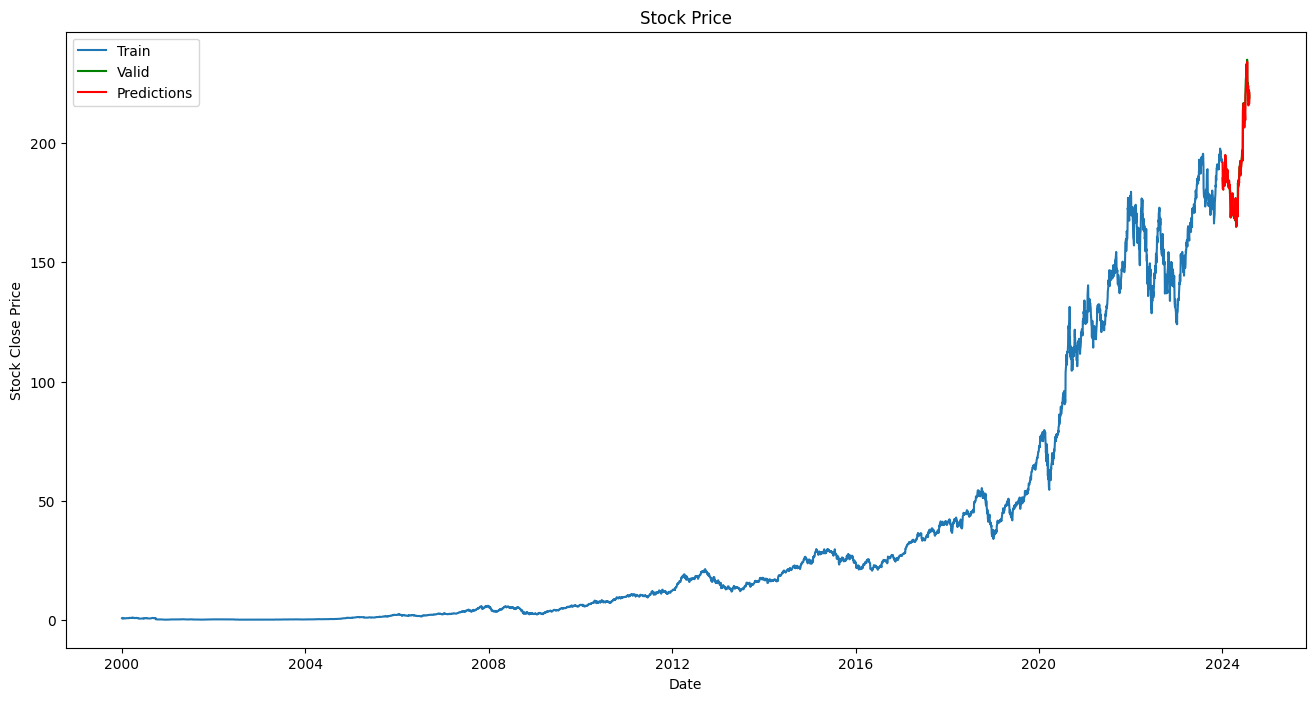

In [ ]:
#visualization
train = data_close[:train_data_len]
valid = data_close[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.plot(train['Adj_Close'])
plt.plot(valid['Adj_Close'], color='green')
plt.plot(valid['Predictions'], color='red')

plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Close Price')
plt.legend(['Train', 'Valid', 'Predictions'])

plt.show()

- test data의 실제 주가 데이터와 예측된 주가 데이터가 전반적으로 일치

<details>
  <summary>Click for English version</summary>

- The actual stock prices and the predicted stock prices in the test data are generally in alignment.

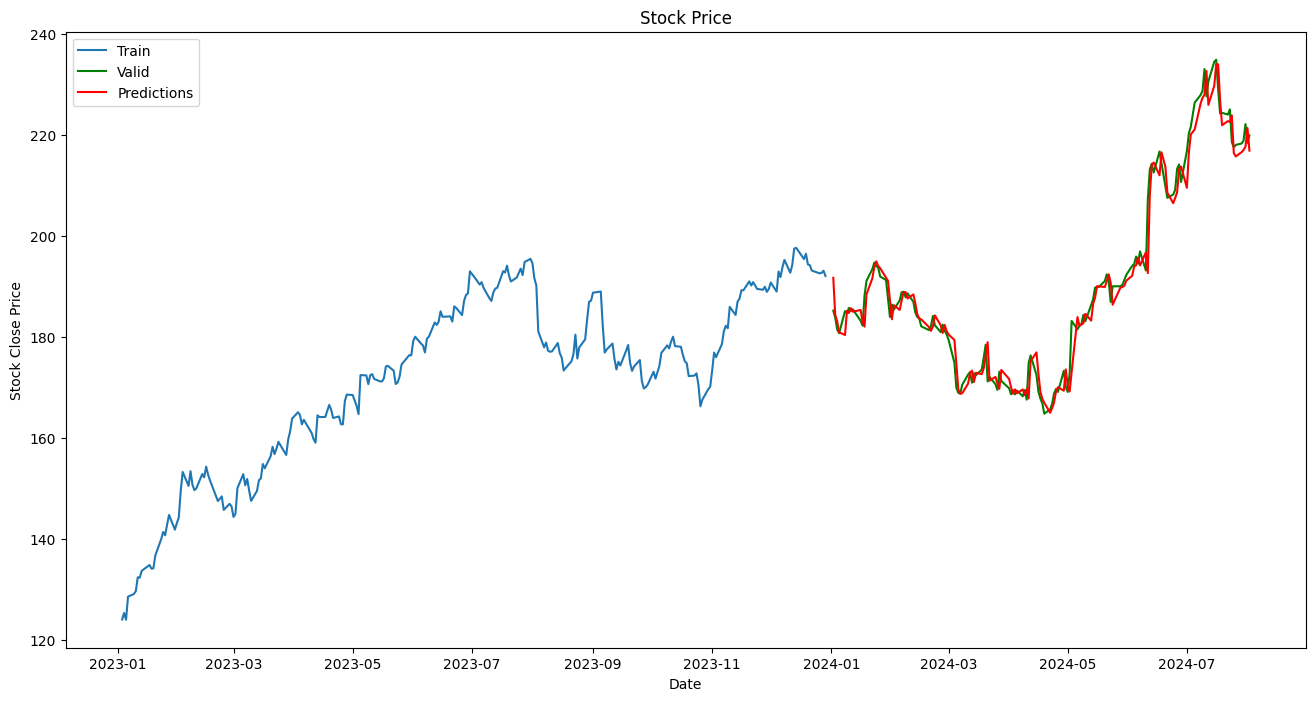

In [ ]:
#visualization after 2023
plt.figure(figsize=(16,8))

plt.plot(train['Adj_Close'].loc['2023-01-01':])
plt.plot(valid['Adj_Close'], color='green')
plt.plot(valid['Predictions'], color='red')

plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Close Price')
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show()

- 예측된 2024년의 데이터를 자세히 보았을 때, 실제값과 예측된 값의 미세한 차이가 존재
- 하지만 전반적인 상승 및 하락 추세는 실제값과 예측값이 동일하게 진행

<details>
  <summary>Click for English version</summary>

- Upon closer examination of the predicted data for 2024, there are minor discrepancies between the actual and predicted values.
- However, the overall upward and downward trends are consistent between the actual values and the predicted values.

# 4. Prediction

앞에서 사용한 LSTM 모델을 활용하여 data에 존재하지 않는 30일 이후의 주가 데이터를 이전 60일 주가를 기준으로 예측해보도록 한다.

<details>
  <summary>Click for English version</summary>

**Using the previously applied LSTM model, we will forecast stock prices for 30 days into the future based on the previous 60 days of stock data.**

In [ ]:
#30days
n_days = 30

#last sequence in test data
last_sequence = x_test[-1]

In [ ]:
future_predictions = []

for _ in range(n_days):
    #future predictions with lastest datasets
    last_sequence_array = np.array(last_sequence[-60:])  #last 60 days
    last_sequence_array = np.reshape(last_sequence_array, (1, last_sequence_array.shape[0], 1))

    next_prediction = model.predict(last_sequence_array)
    future_predictions.append(next_prediction[0, 0])

    #add future predictions in the list
    last_sequence = np.append(last_sequence, next_prediction[0, 0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [ ]:
#inverse_transform
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

In [ ]:
#future dates
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=n_days + 1, freq='D')[1:]

#flatten and concate predictions&future prediction
predicted_prices = np.concatenate([predictions.flatten(), future_predictions.flatten()])

#set date as index
all_dates = df.index[-len(predictions):].append(future_dates)

#dataframe
predicted_series = pd.Series(predicted_prices, index=all_dates)

#only future prediction
future_predictions_series = predicted_series[future_dates]

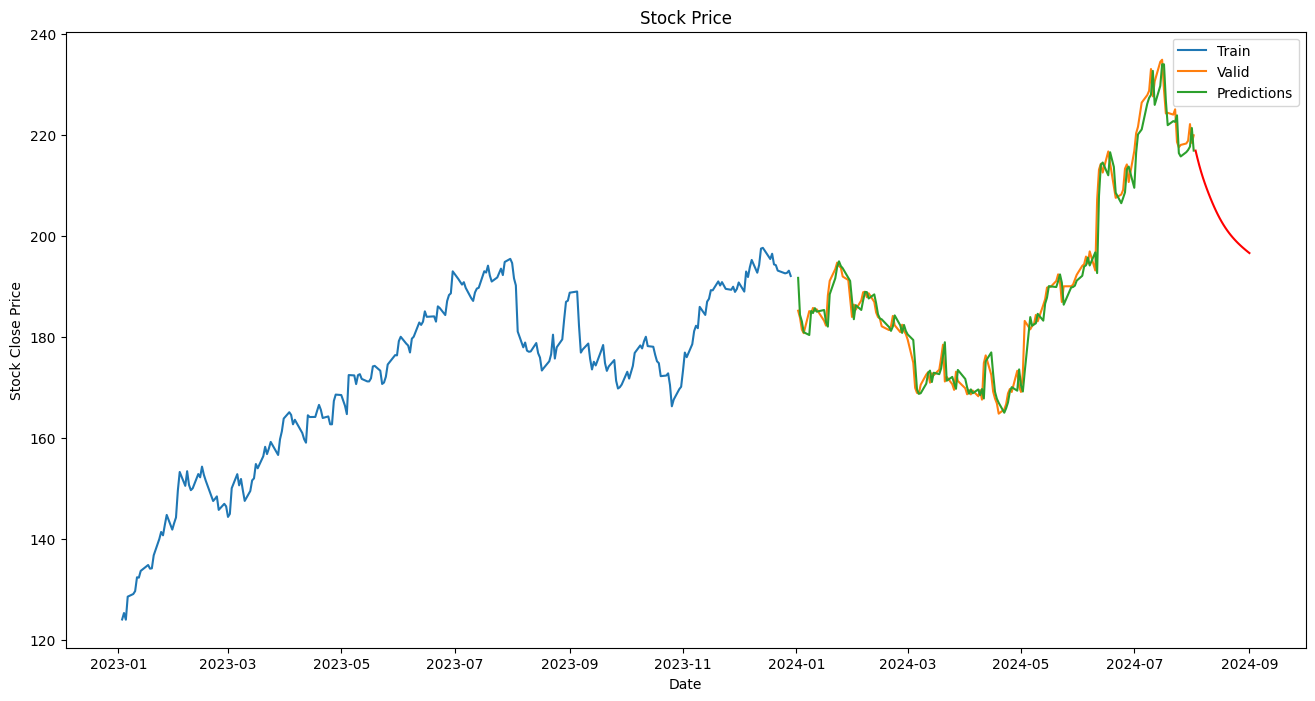

In [ ]:
#visualization
plt.figure(figsize=(16,8))
plt.title('Stock Price')
plt.plot(train['Adj_Close'].loc['2023-01-01':])
plt.plot(valid[['Adj_Close', 'Predictions']])
plt.plot(future_predictions_series, label='Future Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Close Price')
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show()

- 이후 30일의 주가는 하락 추세로 예측

<details>
  <summary>Click for English version</summary>

- The stock prices for the subsequent 30 days are forecasted to show a downward trend.

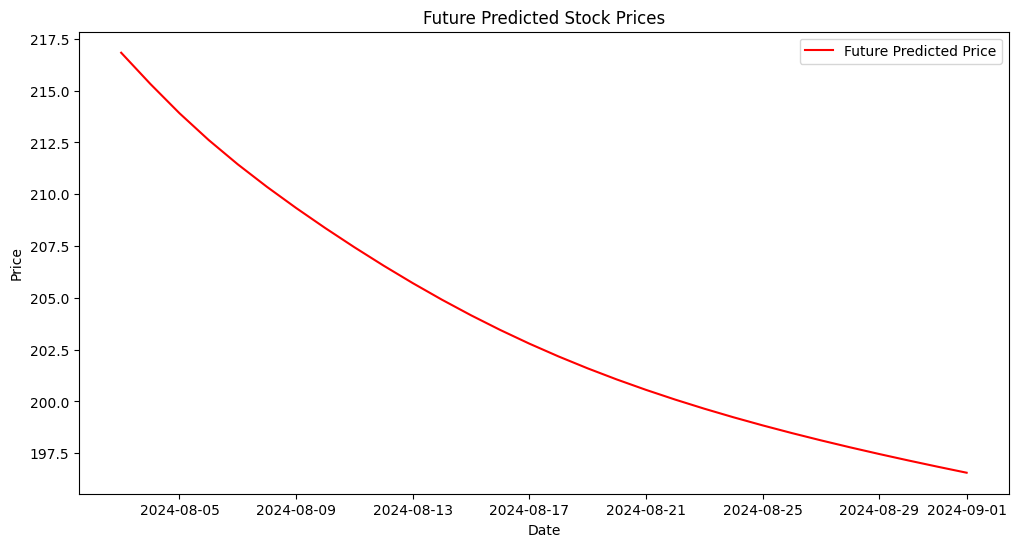

In [ ]:
#visualization
plt.figure(figsize=(12, 6))
plt.plot(future_predictions_series, label='Future Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Future Predicted Stock Prices')
plt.legend()
plt.show()

- 대략 197USD 까지 하락할 것으로 예측

<details>
  <summary>Click for English version</summary>

- It is predicted to drop to approximately 197 USD.

# 5. Result

1. Apple의 주가는 장기적인 데이터에서 전반적으로 상승추세이며 매년 유사한 패턴의 흐름을 갖고 있다.

2. 하지만 2018년 이전까지는 주가 변동성이 일정하게 분포되어 있지만 이후 변동폭이 증가하기 때문에 투자자들의 의사결정에 있어 risk manamgement의 중요성이 증가되었다.

3. 2024년의 그래프를 보았을 때, 상반기의 경우 상승추세를 보였으나 7월 중순부터 하락추세가 감지되고 있다.

4. 따라서, LSTM으로 예측된 8월의 주가는 하락추세를 보여주고 있고 7월 중순부터 하락추세가 감지된 사실과 이전 주가 데이터의 패턴을 고려하여 외부요인에 유의하여 주가 하락의 추세가 시작될 수 있단는 점을 염두에 두고 투자를 결정해야 한다.

<details>
  <summary>Click for English version</summary>

1. Apple's stock price exhibits an overall upward trend in long-term data and follows a similar pattern each year.

2. Prior to 2018, stock price volatility was relatively consistent, but since then, the volatility has increased, highlighting the growing importance of risk management in investor decision-making.

3. Reviewing the 2024 graph, the first half of the year shows an upward trend; however, a downward trend has been detected since mid-July.

4. Therefore, considering that the LSTM forecast predicts a downward trend for August, and that a downward trend has been observed since mid-July, investors should be aware of external factors that might contribute to the initiation of a downward trend in stock prices and make investment decisions accordingly.